### 📌 **Efecto de las Características Demográficas en la Retención de Clientes**

## Objetivo General:
Analizar la data de un caso de negocio aplicando conocimientos de manejo de datos para hallar insights con respecto a la influencia de características demográficas en la decisión sobre abandonar o no el servicio en una empresa de telecomunicaciones.

## Entendimiento del negocio

La industria de las telecomunicaciones se encuentra en un periodo difícil a nivel macroeconómico. A inicios de 2017, la industria representaba cerca del 8.8% del PBI (1). Para el 2018 ya representaba solo el 4.8% del PBI (2). A pesar que durante el 2019 los ingresos de la industria parecieron recuperarse (3), al momento no se sabe si la tendencia continuará o no durante el 2020 debido al efecto de la pandemia. En vista que al parecer la industria está ya "saturada" (lo que dificulta la captura de clientes nuevos), la estrategia de las empresas de telecomunicaciones (en adelante, telcos) ha tenido que cambiar y darle mayor importancia a dos cosas:

1.   Los mecanismos para quitarle clientes a su competencia (por medio de la portabilidad numérica)
2.   Retención (blindaje) de clientes para evitar que realicen portabilidad hacia otro operador.

En el contexto del punto (2), las telcos tienen el constante desafío de diseñar campañas para disminuir la tasa de abandono de sus clientes (conocido como *churn*). Esta tasa de abandono puede ser definida como el cociente de la cantidad de clientes que se pierden en un periodo entre la cantidad de clientes en un punto en el tiempo que sirve de referencia. Por ejemplo: si al inicio de un mes se tuvieran 100 clientes y durante el mes se pierden 5, la tasa de abandono sería del 5%. Ciertamente el análisis es más delicado, ya que un cliente puede tener varias líneas a su nombre; sin embargo, para simplificar el trabajo, **en todo momento se trabajará con la premisa que todo cliente tiene solo una línea**<br>
1.   Bolsa de Trabajo PUCP. Informe de Analisis Sectorial: Sector Telecomunicaciones. PUCP, Enero 2019. Pag. 13, fig. #7. (En línea: https://btpucp.pucp.edu.pe/informe-sectorial/informe-de-analisis-sectorial-2019-sector-telecomunicaciones/)
2.   Gerencia de Comunicación Corporativa Osiptel. Sector telecomunicaciones aporta 4.8% al PBI nacional. Osiptel, Agosto 2018. (En línea: https://www.osiptel.gob.pe/noticia/)np-sector-telecomunicaciones-aporta-pbi-nacional
3.   Garcia, J.; Sanchez, A.; Montoya, L.; Cueto, M. Informe técnico de producción nacional. INEI, Junio 2019. (En línea: https://www.inei.gob.pe/media/MenuRecursivo/boletines/informe-tecnico_produccion_abril.pdf)


## Entendimiento de los Datos

La información de la empresa se encuentra en bases de datos. En particular, se tiene a disposición dos tablas:


1.   Base con todos los clientes de la compañia y algunos datos demográficos.
2.   Base con la información de comportamiento de los clientes.

La base (1) tiene los siguientes campos:

*   Client_ID: identificador único del cliente.
*   Género: (M) para masculino, (F) para femenino.
*   Edad: edad (años cumplidos) del cliente.
*   NSE: nivel socioecónomico del cliente.
*   Estado civil: (S) soltero, (C) casado, (V) viudo.
*   Departamento: lugar de residencia declarada por el cliente.
*   Elemento de la lista

La base (2) tiene los siguientes campos:

*   Client_ID: identificador único del cliente.
*   Renta: renta básica del plan.
*   Uso_SMS: número de SMS enviados en el mes.
*   Deuda_Ant: deuda facturada en el mes anterior.
*   Min_callcenter: minutos de llamadas al centro de atención.
*   Antiguedad: antiguedad del cliente (en meses).
*   Uso_MB: total de MB consumidos en el periodo.
*   Deuda_Act: deuda facturada en el mes.
*   Uso_APP: MB consumidas en el APP de la operadora.
*   Min_Ent_3M: cantidad de llamadas recibidas por el cliente en los últimos 3 meses.
*   Min_Sal_3M: cantidad de llamadas realizadas por el cliente en los últimos 3 meses.
*   Churn: si es diferente de 0, hizo churn en el mes.


## 1️⃣ Limpieza y tratamiento de los datos

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Para la primera tabla**

In [ ]:
df1 = pd.read_csv('Maestro_Clientes.csv', sep = ';', index_col= 'CLIENT_ID')
df1.head()

,GENERO,EDAD,NSE,ESTADOCIVIL,DEPARTAMENTO,CAPDEUDA
CLIENT_ID,,,,,,
0,F,999,1,S,LIMA,47.903088
1,M,26,1,C,LIMA,50.414563
2,F,35,1,NaN,LIMA,49.516079
3,M,30,1,V,LIMA,48.304420
4,F,65,1,NaN,LIMA,49.493112


In [ ]:
df1.dtypes

,0
GENERO,object
EDAD,object
NSE,int64
ESTADOCIVIL,object
DEPARTAMENTO,object
CAPDEUDA,float64


In [ ]:
df1.describe()

,NSE,CAPDEUDA
count,5000.0,5000.000000
mean,1.0,50.002158
std,0.0,0.996175
min,1.0,46.080974
25%,1.0,49.340872
50%,1.0,50.010395
75%,1.0,50.675459
max,1.0,53.821671


La variable NSE resulta irrelevante por contar con un solo valor.

In [ ]:
df1.drop('NSE', axis = 1, inplace = True)

In [ ]:
df1.describe(include= 'object')

,GENERO,EDAD,ESTADOCIVIL,DEPARTAMENTO
count,4950,5000,178,5000
unique,2,56,3,15
top,F,63,C,LIMA
freq,2476,119,144,1134


In [ ]:
df1['EDAD'].value_counts()

,count
EDAD,
63,119
26,118
61,116
31,112
46,111
64,111
16,110
19,108
32,107


La variable EDAD tiene valores no deseados.

In [ ]:
df1.loc[df1['EDAD'] == 'F', 'EDAD'] = 40
df1['EDAD'] = df1.EDAD.astype(np.int64)

In [ ]:
df1.isnull().sum()/len(df1) * 100

,0
GENERO,1.00
EDAD,0.00
ESTADOCIVIL,96.44
DEPARTAMENTO,0.00
CAPDEUDA,0.00


En el caso de GENERO se tienen un porcentaje muy pequeño, por lo que se puede completar con una medida de tendencia central como la moda. Caso contrario sucede con la variable ESTADOCIVIL que tiene 96% de valores nulos, imputarle solo podría generar un sesgo al momento de generar un modelo. Por ello es mejor prescindir de esta variable.

In [ ]:
df1['GENERO'].fillna(df1['GENERO'].mode()[0], inplace=True)
df1.drop('ESTADOCIVIL', axis = 1, inplace = True)

<ipython-input-10-e500921a13b0>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['GENERO'].fillna(df1['GENERO'].mode()[0], inplace=True)


Volviendo a la variable EDAD, se mostrará un boxplot para observar los valores atípicos.

In [ ]:
df1['EDAD'].describe()

,EDAD
count,5000.0000
mean,40.4982
std,20.1206
min,5.0000
25%,28.0000
50%,40.0000
75%,53.0000
max,999.0000


<Axes: ylabel='EDAD'>

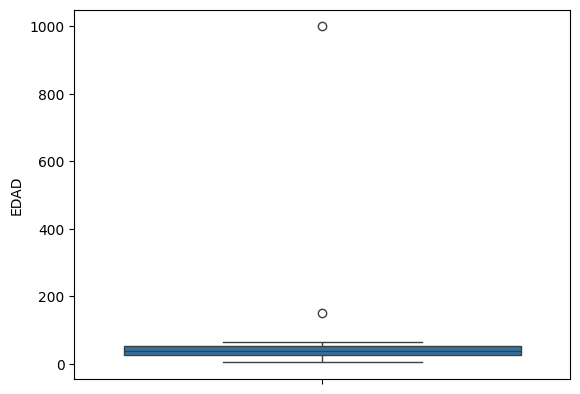

In [ ]:
sns.boxplot(df1['EDAD'])

Para estos casos, se puede utilizar algún criterio para deshacerse de las anomalías. Uno de ellos suele ser el rango intercuantílico (IQR). Sin embargo, para este caso, se tiene pocos valores anormales, por lo que se puede hacer una imputación de datos.

In [ ]:
df1.loc[df1['EDAD'] < 10, 'EDAD'] = df1['EDAD'].median()
df1.loc[df1['EDAD'] > 100, 'EDAD'] = df1['EDAD'].median()

In [ ]:
df1.shape

(5000, 4)

In [ ]:
df1.to_csv('Maestro_Clientes_F.csv', sep = ';')

**Para la segunda tabla**

In [ ]:
df2 = pd.read_csv('Datos_Clientes.csv', sep = ';', index_col= 'CLIENT_ID')
df2.head()

,RENTA,USO_SMS,DEUDA_ANT,MIN_CALLCENTER,ANTIGUEDAD,USO_MB,DEUDA_ACT,USO_APP,MIN_ENT_3M,MIN_SAL_3M,CHURN
CLIENT_ID,,,,,,,,,,,
0,49.047829,49.689196,50.259706,48.384797,51.0,49.034758,48.833764,NaN,50.205127,50.693596,0
1,49.884485,49.126422,49.968794,51.132655,52.0,47.901566,48.864555,NaN,48.686966,49.074329,1
2,49.674159,49.008166,48.994351,47.206821,48.0,50.561100,52.411366,NaN,49.441751,49.950721,2
3,50.971497,NaN,50.074096,47.980931,49.0,49.279711,NaN,NaN,49.966708,51.943082,0
4,52.313414,50.962695,49.619874,46.892785,49.0,51.430192,NaN,NaN,52.333953,47.780843,0


In [ ]:
df2.dtypes

,0
RENTA,float64
USO_SMS,float64
DEUDA_ANT,float64
MIN_CALLCENTER,float64
ANTIGUEDAD,float64
USO_MB,float64
DEUDA_ACT,float64
USO_APP,float64
MIN_ENT_3M,float64
MIN_SAL_3M,float64


In [ ]:
df2.describe()

,RENTA,USO_SMS,DEUDA_ANT,MIN_CALLCENTER,ANTIGUEDAD,USO_MB,DEUDA_ACT,USO_APP,MIN_ENT_3M,MIN_SAL_3M,CHURN
count,5000.000000,4941.000000,4970.000000,4945.000000,4982.000000,5000.000000,4876.000000,2406.000000,5000.000000,5000.000000,5000.000000
mean,49.996438,49.996173,50.002466,49.649625,50.000803,49.664025,49.992609,50.934673,49.646886,50.681524,1.001600
std,1.697692,0.998781,1.003960,1.932205,1.901299,1.670186,1.011375,1.940996,1.664316,1.623937,0.815923
min,44.507645,46.154745,46.433099,42.182816,42.000000,43.882448,46.710618,44.721870,43.576740,44.448984,0.000000
25%,48.789116,49.320695,49.336471,48.325118,49.000000,48.474289,49.298147,49.741739,48.458855,49.609712,0.000000
50%,49.951287,49.979526,50.015639,49.599408,50.000000,49.650173,50.008107,50.737098,49.665599,50.709345,1.000000
75%,51.148177,50.670436,50.688575,50.954854,51.000000,50.875867,50.670712,52.207036,50.838652,51.767417,2.000000
max,55.868670,53.895572,53.146460,56.371546,59.000000,55.867741,53.424610,60.880871,55.679447,56.964870,2.000000


In [ ]:
df2.isnull().sum()/len(df2) * 100

,0
RENTA,0.00
USO_SMS,1.18
DEUDA_ANT,0.60
MIN_CALLCENTER,1.10
ANTIGUEDAD,0.36
USO_MB,0.00
DEUDA_ACT,2.48
USO_APP,51.88
MIN_ENT_3M,0.00
MIN_SAL_3M,0.00


In [ ]:
df2.drop('USO_APP', axis = 1, inplace = True)

In [ ]:
df2['ANTIGUEDAD'].fillna(df2['ANTIGUEDAD'].median(), inplace=True)

<ipython-input-21-9692871fa592>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['ANTIGUEDAD'].fillna(df2['ANTIGUEDAD'].median(), inplace=True)


En otros casos, un vacío puede representar la ausencia de medición. En el caso de una base de datos, puede ser producto de un outer join sin coincidencia. En estos casos, podría completarse con una constante como cero (0).

In [ ]:
df2['USO_SMS'] = df2['USO_SMS'].fillna(0)
df2['MIN_CALLCENTER'] = df2['MIN_CALLCENTER'].fillna(0)

Si no ha habido cambio de plan tarifario, el monto facturado el mes anterior debe ser igual al monto facturado en el mes actual. Por tanto, los vacíos de la columna DEUDA_ACT pueden completarse con los de DEUDA_ANT y viceversa.

In [ ]:
df2.loc[df2.DEUDA_ACT.isnull(),['DEUDA_ACT']] = df2['DEUDA_ANT']
df2['DEUDA_ANT'] = df2['DEUDA_ANT'].fillna(df2['DEUDA_ACT'])

Actualmente, la variable CHURN trae varios valores: 0 si el cliente ya no forma parte de la base al cierre del mes y valores distintos de 0 en caso contrario. De esta manera, el significado de la variable no es claro. Por lo que se transformará la variable, de manera que tome el valor de 1 si el cliente abandonó la companía (ya no forma parte de la base de clientes) y 0 de caso contrario.

In [ ]:
df2['CHURN'] = np.where(df2['CHURN']==0,1,0)

In [ ]:
df2.to_csv('Datos_Clientes_F.csv', sep = ';')

## 2️⃣**Análisis Exploratorio de Datos (EDA)**

In [ ]:
df = pd.merge(df1,df2,left_index=True,right_index=True)
print(df.shape)

(5000, 14)


In [ ]:
df.head()

,GENERO,EDAD,DEPARTAMENTO,CAPDEUDA,RENTA,USO_SMS,DEUDA_ANT,MIN_CALLCENTER,ANTIGUEDAD,USO_MB,DEUDA_ACT,MIN_ENT_3M,MIN_SAL_3M,CHURN
CLIENT_ID,,,,,,,,,,,,,,
0,F,40,LIMA,47.903088,49.047829,49.689196,50.259706,48.384797,51.0,49.034758,48.833764,50.205127,50.693596,1
1,M,26,LIMA,50.414563,49.884485,49.126422,49.968794,51.132655,52.0,47.901566,48.864555,48.686966,49.074329,0
2,F,35,LIMA,49.516079,49.674159,49.008166,48.994351,47.206821,48.0,50.561100,52.411366,49.441751,49.950721,0
3,M,30,LIMA,48.304420,50.971497,0.000000,50.074096,47.980931,49.0,49.279711,50.074096,49.966708,51.943082,1
4,F,65,LIMA,49.493112,52.313414,50.962695,49.619874,46.892785,49.0,51.430192,49.619874,52.333953,47.780843,1


**Variable categóricas**

In [ ]:
cols = df.dtypes
colnms = df.columns

i = 0
cat_cols = []
for eachcol in cols:
    if eachcol.name=="object":
        cat_cols.append(colnms[i])
    i+=1

In [ ]:
cat_cols

['GENERO', 'DEPARTAMENTO']

In [ ]:
for x in cat_cols:
    print(x)
    frecuencias = df[x].value_counts(dropna=False)
    porcentajes = (frecuencias / len(df)) * 100
    print(pd.DataFrame({'Frecuencia': frecuencias, 'Porcentaje (%)': porcentajes}))
    print("\n")

GENERO
        Frecuencia  Porcentaje (%)
GENERO                            
F             2526           50.52
M             2474           49.48


DEPARTAMENTO
              Frecuencia  Porcentaje (%)
DEPARTAMENTO                            
LIMA                1134           22.68
AREQUIPA             485            9.70
CUSCO                483            9.66
PASCO                483            9.66
AYACUCHO             322            6.44
ICA                  322            6.44
TACNA                322            6.44
JUNIN                322            6.44
PUNO                 161            3.22
MOQUEGUA             161            3.22
LORETO               161            3.22
LA LIBERTAD          161            3.22
ANCASH               161            3.22
UCAYALI              161            3.22
PIURA                161            3.22




**Variables numéricas**

In [ ]:
cols = df.dtypes

colnms = df.columns

i = 0
num_cols = []
for eachcol in cols:
    if (eachcol.name=="int64" or eachcol.name=="float64"):
        num_cols.append(colnms[i])
    i+=1

In [ ]:
num_cols

['EDAD',
 'CAPDEUDA',
 'RENTA',
 'USO_SMS',
 'DEUDA_ANT',
 'MIN_CALLCENTER',
 'ANTIGUEDAD',
 'USO_MB',
 'DEUDA_ACT',
 'MIN_ENT_3M',
 'MIN_SAL_3M',
 'CHURN']

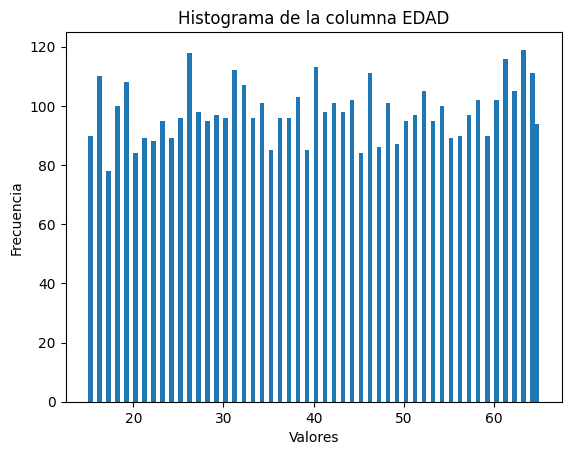

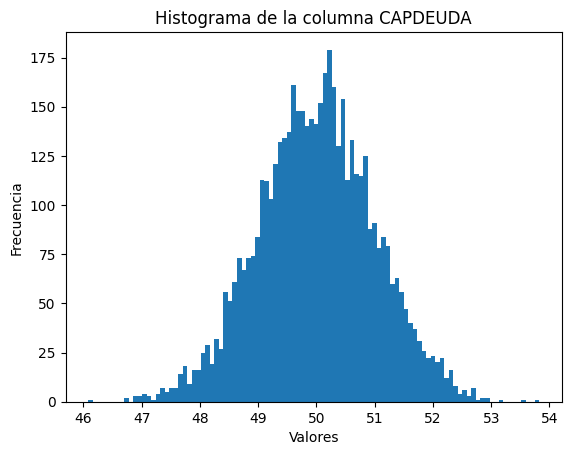

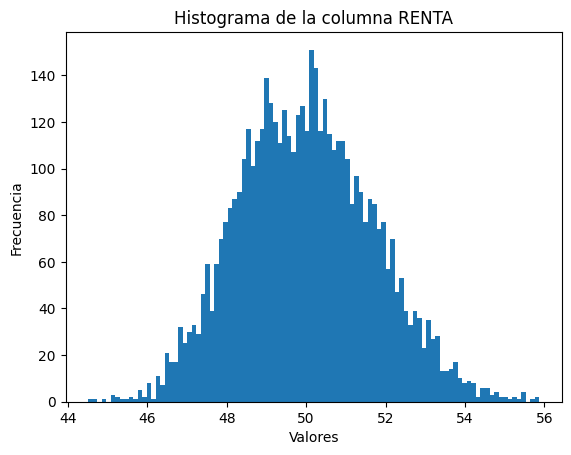

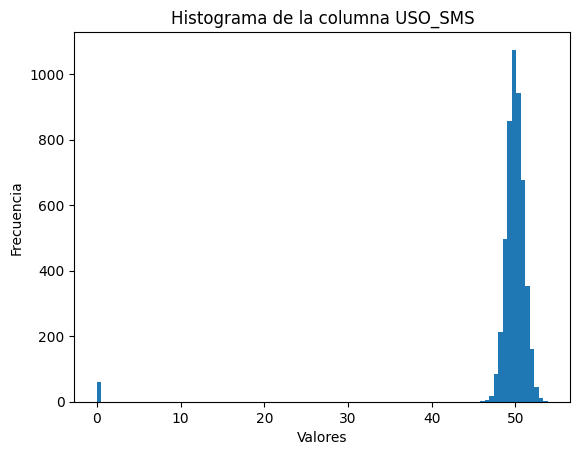

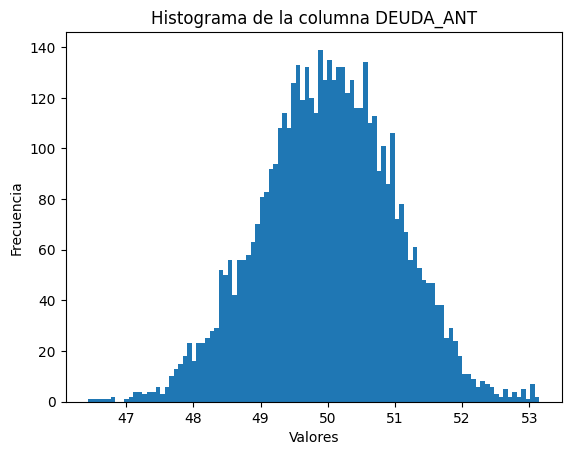

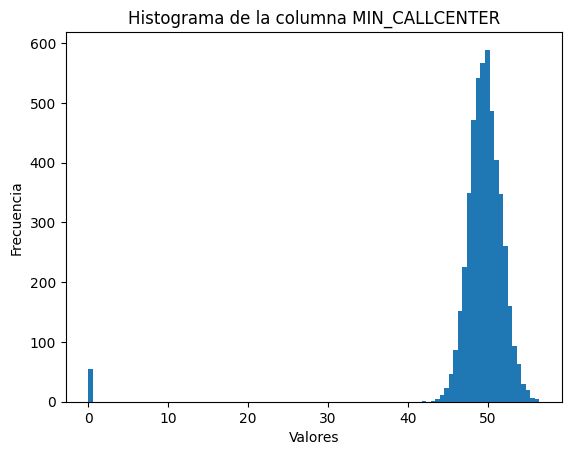

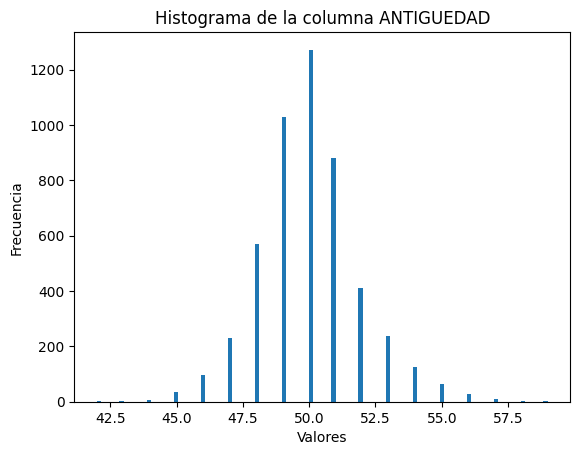

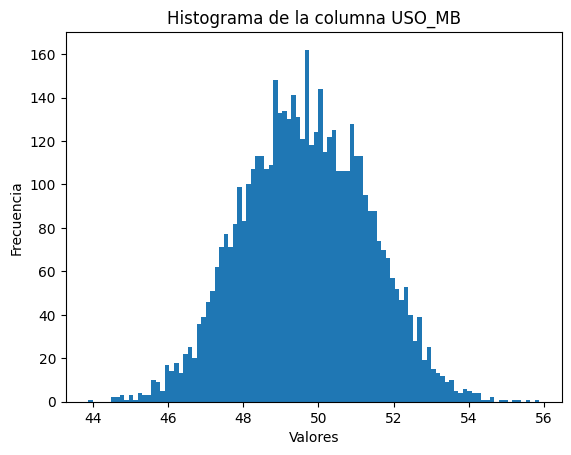

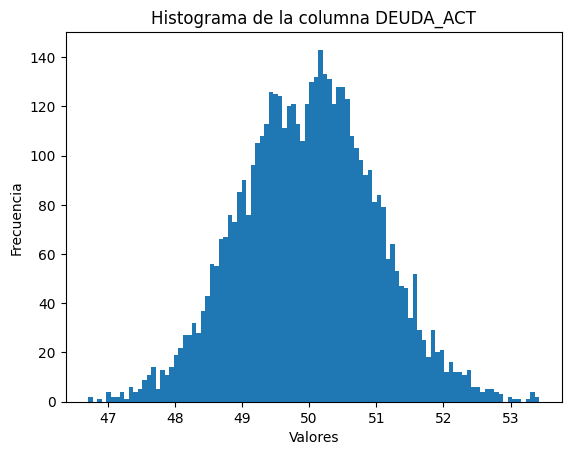

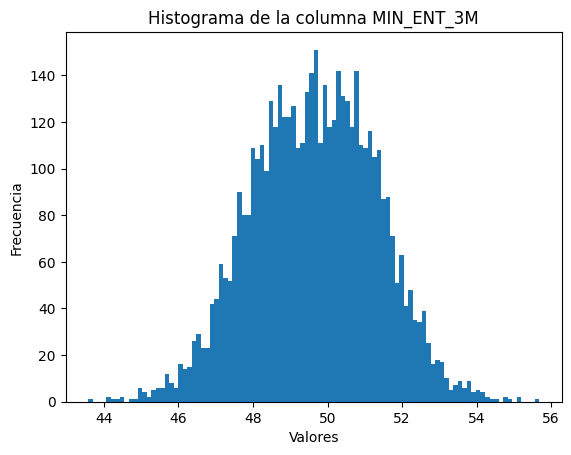

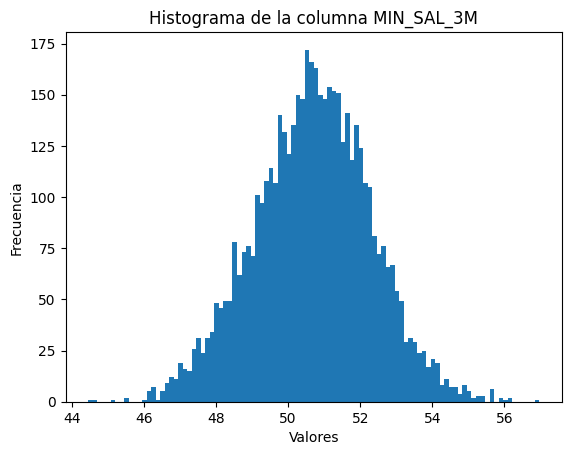

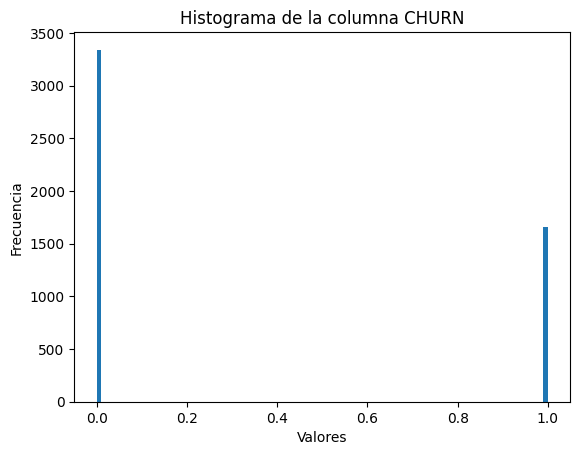

In [ ]:
for col in num_cols:
  plt.hist(df[col], bins = 100)
  plt.title("Histograma de la columna " + col)
  plt.xlabel("Valores")
  plt.ylabel("Frecuencia")
  plt.show()

###**Análisis demográfico**

In [ ]:
churn_promedio_base = df.CHURN.sum()/df.shape[0]*100
permanencia_promedio_base = 1 - churn_promedio_base
print('Porcentaje de Churn promedio: {}%'.format(round(churn_promedio_base,2)))

Porcentaje de Churn promedio: 33.2%


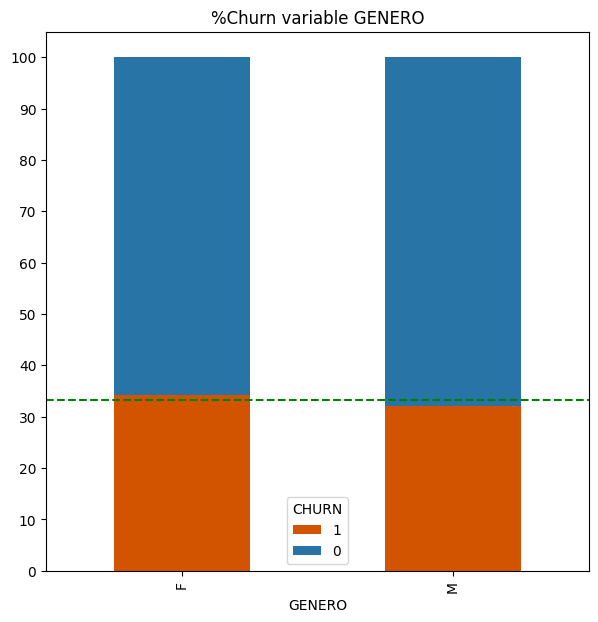

In [ ]:
df_cuentas = df.groupby(['GENERO', 'CHURN']).size().reset_index().pivot(columns='CHURN', index='GENERO', values=0)
df_cuentas_p = df_cuentas.apply(lambda x: x*100/sum(x), axis=1)
df_cuentas_p = df_cuentas_p[[1, 0]]
df_cuentas_p.plot(kind='bar',
                  stacked=True,
                  figsize=(7,7),
                  legend=8,
                  yticks=range(0,105,10),
                  title='%Churn variable GENERO',
                  color=['#D35400', '#2874A6'])
plt.axhline(churn_promedio_base, color='g', linestyle='--')
plt.show()

Probabilidad de que el género femenino quiera abandonar el servicio.

$$
P(\text{Churn} | \text{Género}) = \frac{\text{Cantidad de mujeres que hicieron Churn}}{\text{Total de clientes mujeres}}
$$

In [ ]:
prob_churn = df.groupby("GENERO")["CHURN"].mean()
prob_churn

,CHURN
GENERO,
F,0.343230
M,0.320534


¿El género influye en el Churn?

H0: El género no influye en el Churn.

H1: El género sí influye en el Churn.

In [ ]:
import scipy.stats as stats

tabla = pd.crosstab(df['GENERO'], df['CHURN'])
chi2, p, dof, expected = stats.chi2_contingency(tabla)
print(f'Chi-cuadrado: {chi2:.4f}, p-valor: {p:.4f}')

if p < 0.05:
    print("El género influye en el churn.")
else:
    print("No hay suficiente información para afirmar que el género influye en el churn.")

Chi-cuadrado: 2.8018, p-valor: 0.0942
No hay suficiente información para afirmar que el género influye en el churn.


Ahora veamoslo desde el punto de vista de la edad. Para ello se creará una nueva variable que agrupe las edades en rangos.

In [ ]:
df['GRUPO_EDAD'] = pd.cut(df['EDAD'],
                           bins=[-1, 24, 35, 50, float('inf')],
                           labels=['Menor de 25', '25-35', '36-50', 'Más de 50'])

<ipython-input-39-f9a4bb01deb9>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_cuentas = df.groupby(['GRUPO_EDAD', 'CHURN']).size().reset_index().pivot(columns='CHURN', index='GRUPO_EDAD', values=0)


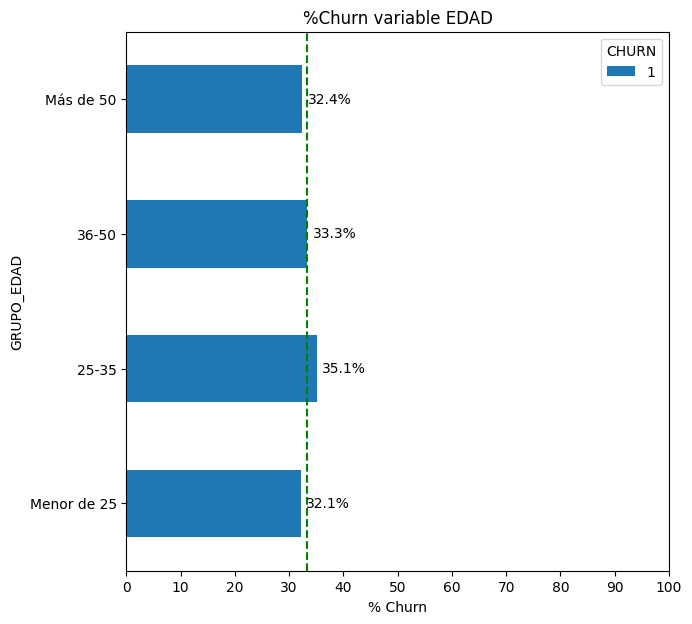

In [ ]:
df_cuentas = df.groupby(['GRUPO_EDAD', 'CHURN']).size().reset_index().pivot(columns='CHURN', index='GRUPO_EDAD', values=0)
df_cuentas_p = df_cuentas.apply(lambda x: x*100/sum(x), axis=1)
df_cuentas_p = df_cuentas_p[[1]]
df_cuentas_p.plot(kind='barh', stacked=True, figsize=(7,7), legend=8, xticks=range(0,105,10))
plt.xlabel('% Churn')
plt.title('%Churn variable EDAD')
plt.axvline(churn_promedio_base, color='g', linestyle='--')
for index, value in enumerate(df_cuentas_p[1]):
    plt.text(value + 1, index, f"{value:.1f}%", va='center', fontsize=10)
plt.show()

Ahora observemos de acuerdo al departamento

In [ ]:
def grafica_bivariada(df, variable_categorica, color_barras):
    clientes_por_categoria = df[variable_categorica].value_counts().sort_index()

    adquisicion_por_categoria = df.groupby(variable_categorica)['CHURN'].mean().sort_index()

    fig, ax1 = plt.subplots(figsize=(10,5))

    sns.barplot(x=clientes_por_categoria.index, y=clientes_por_categoria.values, color=color_barras, ax=ax1)
    ax1.set_ylabel('Cantidad de Clientes', color='white')
    ax1.set_xlabel(variable_categorica, color='white')
    ax1.set_title(f'{variable_categorica} vs Churn', color='white')
    ax1.tick_params(axis='y', colors='white')
    ax1.tick_params(axis='x', colors='white', rotation=45)

    ax2 = ax1.twinx()
    ax2.plot(adquisicion_por_categoria.index, adquisicion_por_categoria.values, color='orange', marker='o')
    ax2.set_ylabel('% Churn', color='white')
    ax2.tick_params(axis='y', colors='white')

    for i, txt in enumerate(adquisicion_por_categoria.values):
        ax2.text(i, txt, f"{txt:.1%}", color='white', ha='center')

    fig.patch.set_facecolor('#151515')
    ax1.set_facecolor('#151515')
    ax2.set_facecolor('#151515')

    plt.show()

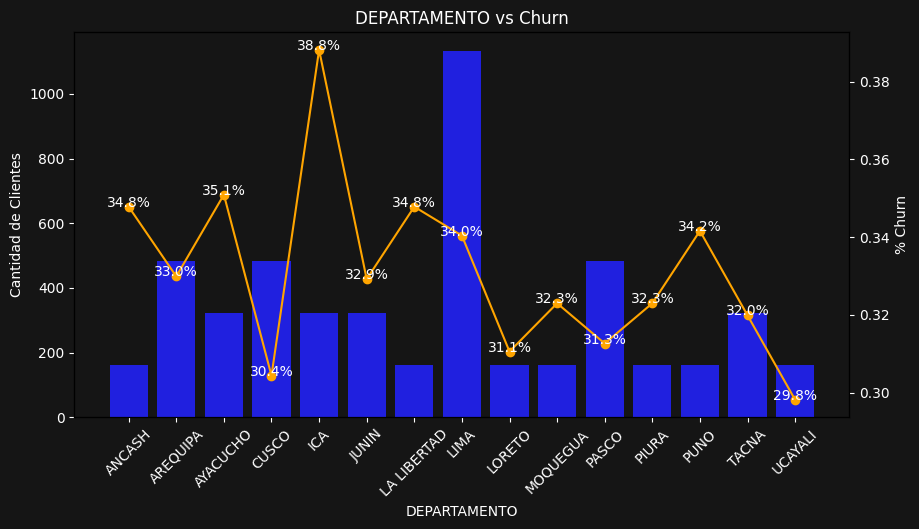

In [ ]:
grafica_bivariada(df, 'DEPARTAMENTO', 'Blue')

Se agrupará por región para observar mejor las provincias con más tendencia al abandono de servicio.

In [ ]:
region_map = {
    #Costa
    'LIMA': 'Costa', 'CALLAO': 'Costa', 'AREQUIPA': 'Costa', 'LA LIBERTAD': 'Costa',
    'PIURA': 'Costa', 'LAMBAYEQUE': 'Costa', 'ICA': 'Costa', 'TUMBES': 'Costa',
    'MOQUEGUA': 'Costa', 'TACNA': 'Costa',

    #Sierra
    'ANCASH': 'Sierra', 'CAJAMARCA': 'Sierra', 'CUSCO': 'Sierra', 'JUNIN': 'Sierra',
    'HUANUCO': 'Sierra', 'APURIMAC': 'Sierra', 'AYACUCHO': 'Sierra', 'HUANCAVELICA': 'Sierra',
    'PUNO': 'Sierra', 'PASCO': 'Sierra',

    #Selva
    'AMAZONAS': 'Selva', 'SAN MARTIN': 'Selva', 'UCAYALI': 'Selva', 'LORETO': 'Selva',
    'MADRE DE DIOS': 'Selva'
}

df['DEPARTAMENTO'] = df['DEPARTAMENTO'].str.strip().str.upper()
df['REGION'] = df['DEPARTAMENTO'].map(region_map)

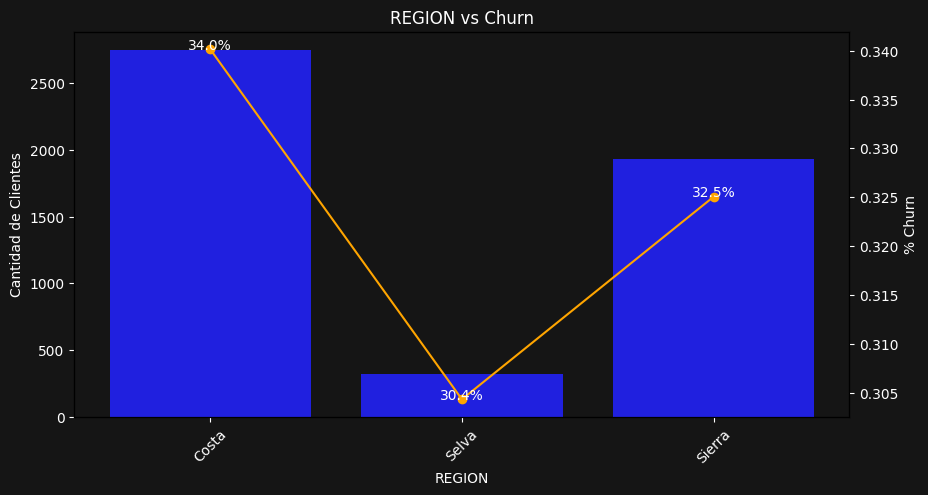

In [ ]:
grafica_bivariada(df, 'REGION', 'Blue')

De estos 2 gráficos, se observa que la costa y la sierra son las regiones con mayor cantidad de abandono de clientes. En la costa, la provincia con mayor % de Churn es Ica (38.8%) y la de menor % de Churn es Tacna (32%); mientras que en la sierra, la provincia con mayor % de Churn es Ayacucho (35.1%) y la de menor % de Churn es Cusco (30.4%).

Ahora se analizará GENERO, EDAD (25-35 años), Región (Costa y Sierra) que hayan realizado un abandono de servicio.

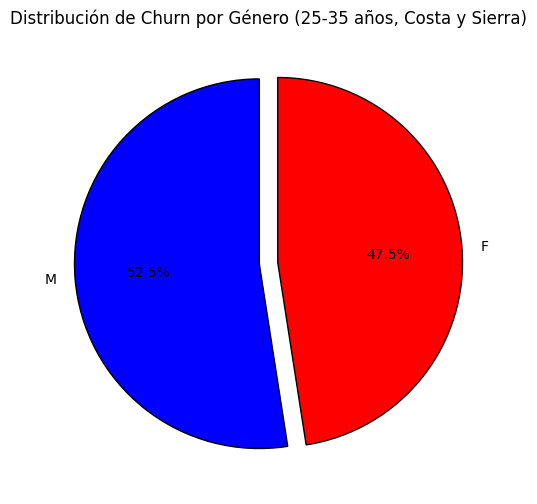

In [ ]:
df_filtered = df[(df['CHURN'] == 1) &
                 (df['GRUPO_EDAD'] == '25-35') &
                 (df['REGION'].isin(['Costa', 'Sierra']))]

churn_counts = df_filtered['GENERO'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', colors=['blue', 'red'], startangle=90,
        wedgeprops={'edgecolor': 'black'}, explode=[0.05, 0.05])

plt.title('Distribución de Churn por Género (25-35 años, Costa y Sierra)')
plt.show()

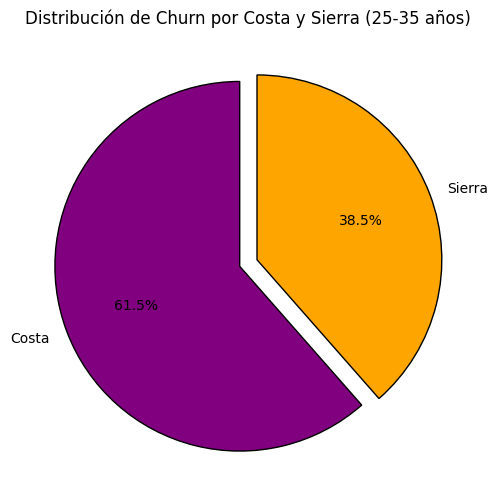

In [ ]:
df_filtered = df[(df['CHURN'] == 1) &
                 (df['GRUPO_EDAD'] == '25-35') &
                 (df['REGION'].isin(['Costa', 'Sierra']))]

# Contar la cantidad de clientes que hicieron churn por región
churn_counts = df_filtered['REGION'].value_counts()

# Crear gráfico circular
plt.figure(figsize=(6, 6))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', colors=['purple', 'orange'], startangle=90,
        wedgeprops={'edgecolor': 'black'}, explode=[0.05, 0.05])

plt.title('Distribución de Churn por Costa y Sierra (25-35 años)')
plt.show()

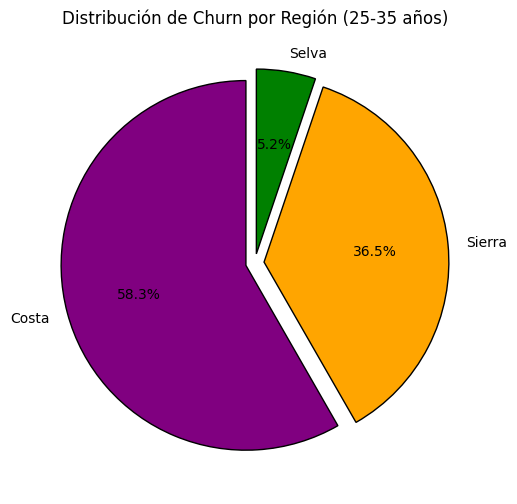

In [ ]:
df_filtered = df[(df['CHURN'] == 1) &
                 (df['GRUPO_EDAD'] == '25-35') &
                 (df['REGION'].isin(['Costa', 'Sierra', 'Selva']))]

churn_counts = df_filtered['REGION'].value_counts()
colors = ['purple', 'orange', 'green']

plt.figure(figsize=(6, 6))
plt.pie(churn_counts,
        labels=churn_counts.index,
        autopct='%1.1f%%',
        colors=colors,
        startangle=90,
        wedgeprops={'edgecolor': 'black'},
        explode=[0.05] * len(churn_counts))
plt.title('Distribución de Churn por Región (25-35 años)')
plt.show()

In [ ]:
import geopandas as gpd

shapefile_url = "DEPARTAMENTOS_inei_geogpsperu_suyopomalia.shp"
peru_map = gpd.read_file(shapefile_url)
peru_map.columns

Index(['OBJECTID', 'CCDD', 'NOMBDEP', 'FUENTE', 'FUENTE_1', 'POB_PROYEC',
       'POBTOTAL', 'POB_EDAD_T', 'POB_EDAD_1', 'POB_EDAD_E', 'POB_EDAD_2',
       'DENSIDAD', 'POBMASCU', 'POBFEMEN', 'POBMASCU_P', 'POBFEMEN_P',
       'R_MASCULIN', 'POBURBANA', 'POBRURAL', 'POBURBANA_', 'POBRURAL_P',
       'EDAD_PROME', 'EDAD_MEDIA', 'POB_0_14', 'POB_0_14_P', 'POB_15_29',
       'POB_15_29_', 'POB_30_59', 'POB_30_59_', 'POB_60_MAS', 'POB_60_M_1',
       'POB_ANALFA', 'POB_ANAL_1', 'HOMBRES_AN', 'HOMBRES__1', 'MUJERES_AN',
       'MUJERES__1', 'MUJERES_ED', 'MUJERES__2', 'TOTAL_MADR', 'MADRES_SOL',
       'MADRES_S_1', 'MUJERES_AD', 'MADRES_ADO', 'MADRES_A_1', 'AL_MENOS_1',
       'AL_MENOS_2', 'SIN_DISCAP', 'SIN_DISC_1', 'ALGUNA_NBI', 'NBI_PORC',
       'VIV_PARTIC', 'VIV_PART_1', 'VIV_PART_2', 'HOGARES', 'Shape_Leng',
       'Shape_Area', 'IC_INF', 'IC_SUP', 'UBIC_POBMO', 'TOTAL_DEFU',
       'TOTAL_DE_1', 'TOTAL_DE_2', 'NAC_BAJOPE', 'NAC_BAJO_1', 'MUJERES_NA',
       'MUJERES__3', 'HOMBRES_

In [ ]:
peru_map.head()

,OBJECTID,CCDD,NOMBDEP,FUENTE,FUENTE_1,POB_PROYEC,POBTOTAL,POB_EDAD_T,POB_EDAD_1,POB_EDAD_E,...,IND_121951,IND_122042,IND_122047,IND_516462,IND_516484,Shape_Le_1,Shape_Ar_1,Shape_Le_2,Shape_Ar_2,geometry
0,1.0,01,AMAZONAS,INEI - CPV RESULTADOS,None,426806.0,417365.0,289648.0,69.4,239212.0,...,2139.0,3.184694e+05,3.745422e+05,5094318.10,34164.0,0.022988,0.000013,12.894071,3.203362,"POLYGON ((-77.81211 -2.98962, -77.81332 -2.990..."
1,2.0,02,ANCASH,INEI - CPV RESULTADOS,None,1180638.0,1139115.0,850842.0,74.7,701614.0,...,9366.0,2.252303e+06,1.363318e+06,34431748.77,74385.0,0.000000,0.000000,11.640227,2.954639,"POLYGON ((-77.64692 -8.05086, -77.64669 -8.052..."
2,3.0,03,APURIMAC,INEI - CPV RESULTADOS,None,430736.0,424259.0,310196.0,73.1,252356.0,...,3723.0,7.025553e+05,6.626253e+05,8673503.09,48594.0,0.000000,0.000000,7.730082,1.765933,"POLYGON ((-73.74632 -13.17456, -73.7457 -13.17..."
3,4.0,04,AREQUIPA,INEI - CPV RESULTADOS,None,1497438.0,1460433.0,1135965.0,77.8,970511.0,...,10670.0,2.094167e+06,1.296536e+06,64872968.90,48033.0,0.000000,0.000000,17.391102,5.330046,"POLYGON ((-71.98109 -14.64062, -71.98093 -14.6..."
4,5.0,05,AYACUCHO,INEI - CPV RESULTADOS,None,668213.0,650940.0,478429.0,73.5,390780.0,...,4699.0,9.729801e+05,9.490687e+05,14610956.27,58941.0,0.000000,0.000000,17.132543,3.643617,"POLYGON ((-74.34843 -12.17503, -74.35 -12.1758..."


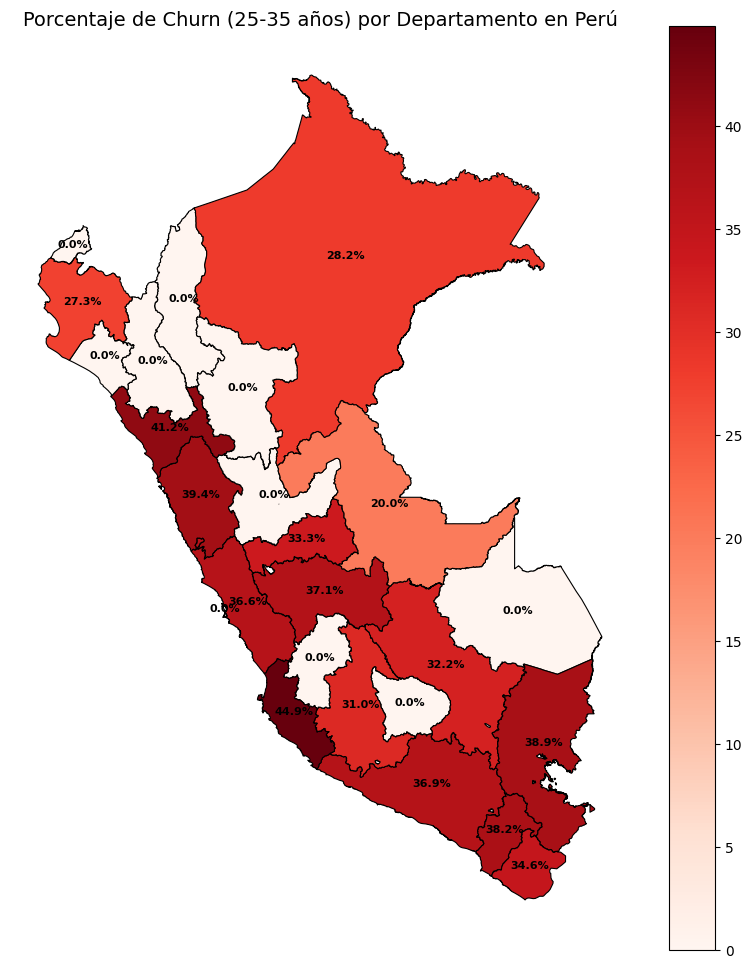

In [ ]:
df_filtered = df[(df['CHURN'] == 1) & (df['GRUPO_EDAD'] == '25-35')]
churn_counts = df_filtered['DEPARTAMENTO'].value_counts().reset_index()
churn_counts.columns = ['DEPARTAMENTO', 'CHURN_COUNT']

total_clientes = df[df['GRUPO_EDAD'] == '25-35']['DEPARTAMENTO'].value_counts().reset_index()
total_clientes.columns = ['DEPARTAMENTO', 'TOTAL_CLIENTES']

peru_map = peru_map.merge(churn_counts, left_on='NOMBDEP', right_on='DEPARTAMENTO', how='left')
peru_map = peru_map.merge(total_clientes, left_on='NOMBDEP', right_on='DEPARTAMENTO', how='left')

peru_map['CHURN_PERCENT'] = (peru_map['CHURN_COUNT'] / peru_map['TOTAL_CLIENTES']) * 100
peru_map[['CHURN_COUNT', 'CHURN_PERCENT']] = peru_map[['CHURN_COUNT', 'CHURN_PERCENT']].fillna(0)

fig, ax = plt.subplots(1, 1, figsize=(10, 12))
peru_map.plot(column='CHURN_PERCENT', cmap='Reds', linewidth=0.8, edgecolor='black', legend=True, ax=ax)

for idx, row in peru_map.iterrows():
    x, y = row['geometry'].centroid.x, row['geometry'].centroid.y
    ax.annotate(f"{row['CHURN_PERCENT']:.1f}%", (x, y), fontsize=8, ha='center', color='black', fontweight='bold')

ax.set_title('Porcentaje de Churn (25-35 años) por Departamento en Perú', fontsize=14)
plt.axis("off")
plt.show()

Probabilidad de que una mujer u hombre de 25 a 35 años abandone el servicio ubicado en la Sierra

In [ ]:
df_sierra = df[(df['GRUPO_EDAD'] == '25-35') & (df['REGION'] == 'Sierra') & (df['GENERO'] == 'F')]
prob_churn_sierra = df_sierra[df_sierra['CHURN'] == 1].shape[0] / df_sierra.shape[0]
print(f'La probabilidad de churn para mujeres de 25-35 años en la Sierra es: {prob_churn_sierra:.2%}')
df_sierra = df[(df['GRUPO_EDAD'] == '25-35') & (df['REGION'] == 'Sierra') & (df['GENERO'] == 'M')]
prob_churn_sierra = df_sierra[df_sierra['CHURN'] == 1].shape[0] / df_sierra.shape[0]
print(f'La probabilidad de churn para hombres de 25-35 años en la Sierra es: {prob_churn_sierra:.2%}')
df_sierra = df[(df['GRUPO_EDAD'] == '25-35') & (df['REGION'] == 'Sierra')]
prob_churn_sierra = df_sierra[df_sierra['CHURN'] == 1].shape[0] / df_sierra.shape[0]
print(f'La probabilidad de churn para clientes de 25-35 años en la Sierra es: {prob_churn_sierra:.2%}\n')


df_costa = df[(df['GRUPO_EDAD'] == '25-35') & (df['REGION'] == 'Costa') & (df['GENERO'] == 'F')]
prob_churn_costa = df_costa[df_costa['CHURN'] == 1].shape[0] / df_costa.shape[0]
print(f'La probabilidad de churn para hombres de 25-35 años en la Costa es: {prob_churn_costa:.2%}')
df_costa = df[(df['GRUPO_EDAD'] == '25-35') & (df['REGION'] == 'Costa') & (df['GENERO'] == 'M')]
prob_churn_costa = df_costa[df_costa['CHURN'] == 1].shape[0] / df_costa.shape[0]
print(f'La probabilidad de churn para hombres de 25-35 años en la Costa es: {prob_churn_costa:.2%}')
df_costa = df[(df['GRUPO_EDAD'] == '25-35') & (df['REGION'] == 'Costa')]
prob_churn_costa = df_costa[df_costa['CHURN'] == 1].shape[0] / df_costa.shape[0]
print(f'La probabilidad de churn para clientes de 25-35 años en la Costa es: {prob_churn_costa:.2%}\n')

La probabilidad de churn para mujeres de 25-35 años en la Sierra es: 32.47%
La probabilidad de churn para hombres de 25-35 años en la Sierra es: 35.94%
La probabilidad de churn para clientes de 25-35 años en la Sierra es: 34.31%

La probabilidad de churn para hombres de 25-35 años en la Costa es: 37.37%
La probabilidad de churn para hombres de 25-35 años en la Costa es: 36.89%
La probabilidad de churn para clientes de 25-35 años en la Costa es: 37.13%



**INSIGHT:**

Los clientes jovenes entre 25 y 35 años ubicados en la Costa son los que representan la mayor tasa Churn, superando en un 25.1% al promedio general. En la Sierra, existe una probabilidad 1.63% mayor a la promedio en esa misma región de que clientes hombres en este mismo rango de edad quieran abandonar el servicio.

##3️⃣**Entrenamiento de modelo**

In [ ]:
df_final = df.copy()

In [ ]:
from sklearn.model_selection import train_test_split
semilla_random_state = 20

X = df_final.drop(columns=['CHURN']).copy()
y = df_final['CHURN']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=semilla_random_state
)

In [ ]:
cols = X.dtypes
colnms = X.columns

i = 0
cat_cols = []
for eachcol in cols:
    if eachcol.name=="object":
        cat_cols.append(colnms[i])
    i+=1

In [ ]:
cols = X.dtypes

colnms = X.columns

i = 0
num_cols = []
for eachcol in cols:
    if (eachcol.name=="int64" or eachcol.name=="float64"):
        num_cols.append(colnms[i])
    i+=1

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])

X_train_sc = preprocessor.fit_transform(X_train)
X_test_sc = preprocessor.transform(X_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=5)
clf.fit(X_train_sc, y_train)

DecisionTreeClassifier(max_depth=5)

In [ ]:
from sklearn.metrics import accuracy_score

y_pred_train = clf.predict(X_train_sc)
print('Train acc.: {:.2}'.format(accuracy_score(y_train, y_pred_train)))

Train acc.: 0.83


In [ ]:
y_pred_test = clf.predict(X_test_sc)
print('Test acc.: {:.2}'.format(accuracy_score(y_test, y_pred_test)))

Test acc.: 0.81


In [ ]:
def print_confusion_matrix(confusion_matrix, accuracy):
  import seaborn as sn
  plt.figure(figsize=(10,7))
  sn.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.title('Confusion matrix. Acc={}'.format(accuracy))
  plt.show()

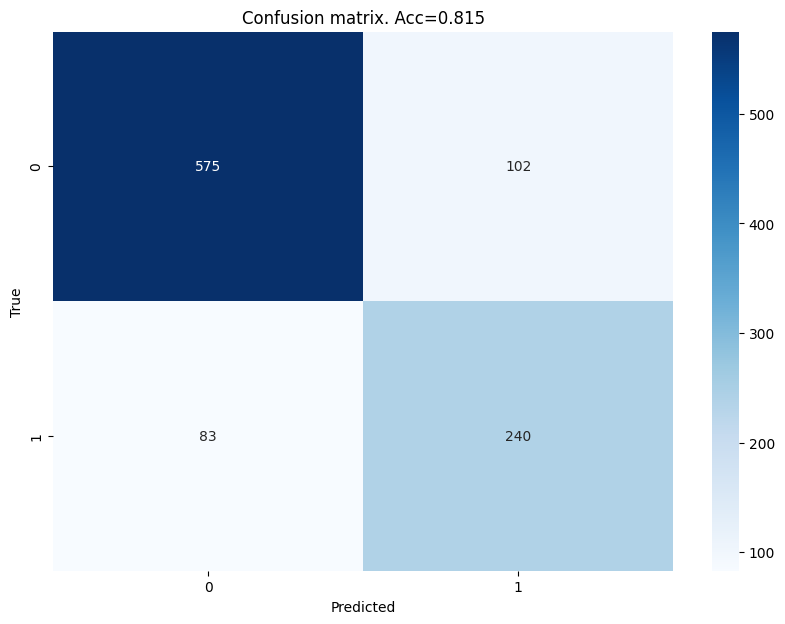

In [ ]:
from sklearn.metrics import confusion_matrix
print_confusion_matrix(confusion_matrix(y_test,y_pred_test), accuracy_score(y_test, y_pred_test))

In [ ]:
from sklearn.model_selection import GridSearchCV

model = DecisionTreeClassifier()

param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': [1, 4, 7, 10, 13]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy')

grid_search.fit(X_train_sc, y_train)

best_params = grid_search.best_params_
print(best_params)

best_model = grid_search.best_estimator_
y_pred_test = best_model.predict(X_test_sc)

print('Test acc.: {:.2}'.format(accuracy_score(y_test, y_pred_test)))

{'criterion': 'entropy', 'max_depth': 10, 'splitter': 'best'}
Test acc.: 0.85


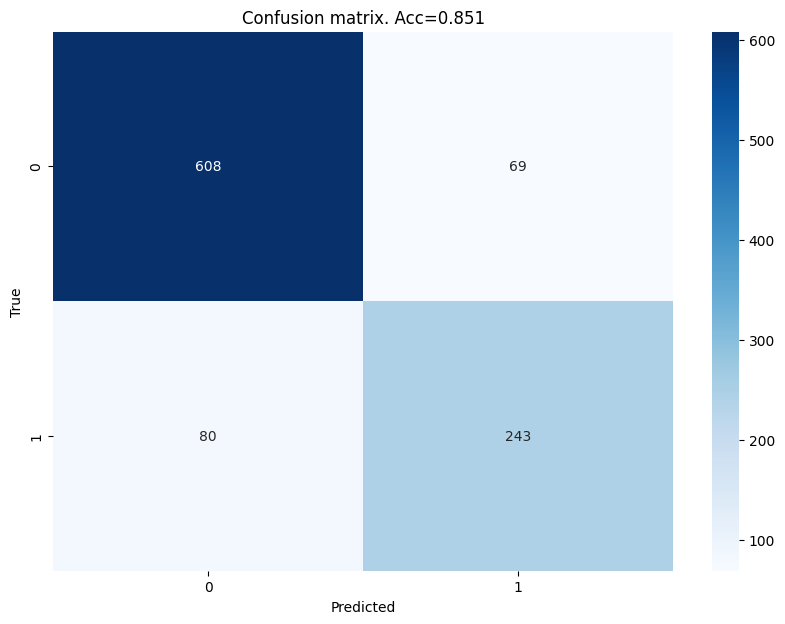

In [ ]:
print_confusion_matrix(confusion_matrix(y_test,y_pred_test), accuracy_score(y_test, y_pred_test))

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, y_pred_test, average='binary')
recall = recall_score(y_test, y_pred_test, average='binary')
f1 = f1_score(y_test, y_pred_test, average='binary')

precision, recall, f1

(0.7788461538461539, 0.7523219814241486, 0.7653543307086614)

In [ ]:
importances = best_model.feature_importances_
importances

array([0.01058312, 0.01195507, 0.28909939, 0.0155698 , 0.01173674,
       0.1431147 , 0.08186207, 0.18716885, 0.01996674, 0.08754178,
       0.132123  , 0.00129818, 0.        , 0.        , 0.00234822,
       0.        , 0.        , 0.00361658, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00201576, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ])

In [ ]:
num_feature_names = num_cols
cat_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(cat_cols)
feature_names = np.concatenate([num_feature_names, cat_feature_names])
len(feature_names)

31

In [ ]:
importances = best_model.feature_importances_
importances_pct = (importances / importances.sum()) * 100

feature_importance_df = pd.DataFrame({
    'Característica': feature_names,
    'Importancia (%)': importances_pct
}).sort_values(by='Importancia (%)', ascending=False)

<ipython-input-84-ffc758951327>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importancia (%)', y='Característica', data=feature_importance_df, palette="viridis")


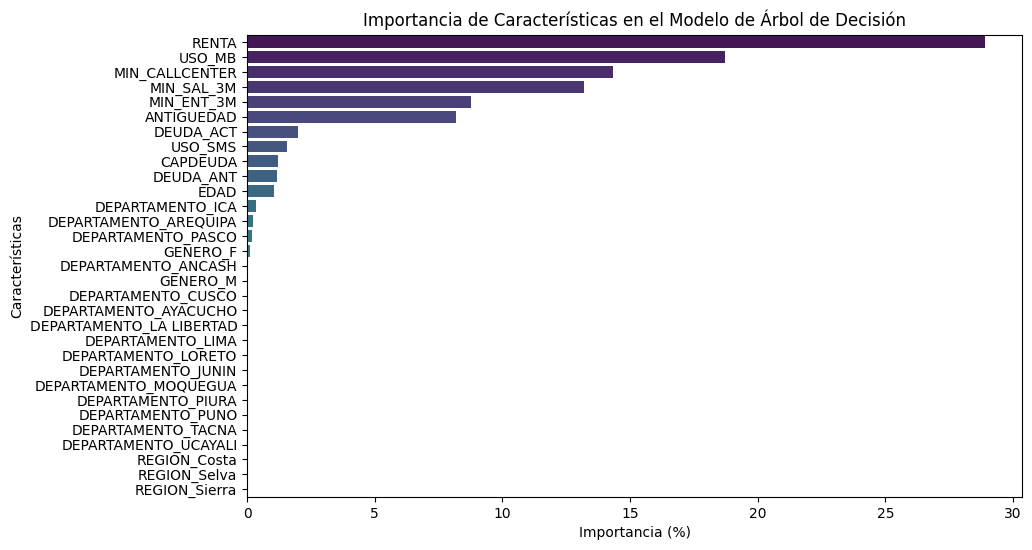

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importancia (%)', y='Característica', data=feature_importance_df, palette="viridis")
plt.xlabel('Importancia (%)')
plt.ylabel('Características')
plt.title('Importancia de Características en el Modelo de Árbol de Decisión')
plt.show()